In [47]:
# Nescessary imports

%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings('ignore')

import os

# import libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set random seed
random.seed(42)

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
%autoreload 2
from classes.data_wraper import Dataset

In [49]:
data_dir = os.path.join(os.getcwd(), 'data')
paths = {
    'FOVfiting2' : os.path.join(data_dir, 'mapsCeline_FOVfitting_2_pol-60.mat'),
    '3quadrants2' : os.path.join(data_dir, 'mapsCeline_3quadrants_2_pol-60.mat'),
    'FOVfiting3' : os.path.join(data_dir, 'mapsCeline_FOVfitting_3_pol-60.mat'),
    '3quadrants3' : os.path.join(data_dir, 'mapsCeline_3quadrants_3_pol-60.mat'),
    'FOVfiting4' : os.path.join(data_dir, 'mapsCeline_FOVfitting_4_pol-60.mat'),
    '3quadrants4' : os.path.join(data_dir, 'mapsCeline_3quadrants_4_pol-60.mat'),
    'FOVfiting5' : os.path.join(data_dir, 'mapsCeline_FOVfitting_5_pol-60.mat'),
    '3quadrants5' : os.path.join(data_dir, 'mapsCeline_3quadrants_5_pol-60.mat'),
    'FOVfiting6' : os.path.join(data_dir, 'mapsCeline_FOVfitting_6_pol-60.mat'),
    '3quadrants6' : os.path.join(data_dir, 'mapsCeline_3quadrants_6_pol-60.mat'),   
    'FOVfiting9' : os.path.join(data_dir, 'mapsCeline_FOVfitting_9_pol-60.mat'),
    '3quadrants9' : os.path.join(data_dir, 'mapsCeline_3quadrants_9_pol-60.mat'),
    'FOVfiting9a' : os.path.join(data_dir, 'mapsCeline_FOVfitting_9a_polNP.mat'),
    '3quadrants9a' : os.path.join(data_dir, 'mapsCeline_3quadrants_9a_polNP.mat')
}

In [50]:
calibration_maps = [paths['FOVfiting2']]
dataset = Dataset(calibration_maps, save_maps=True)

: 

: 

In [ ]:
dataset.preprocess_data()

In [ ]:
dataset.crop_data(128)

In [ ]:
%autoreload 2
from classes.utils import plot_map, plot_radial_profile
from scipy.ndimage import rotate

2023-06-08 16:08:00.422096: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 16:08:00.891999: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 16:08:00.906872: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 16:08:04.352005: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


189


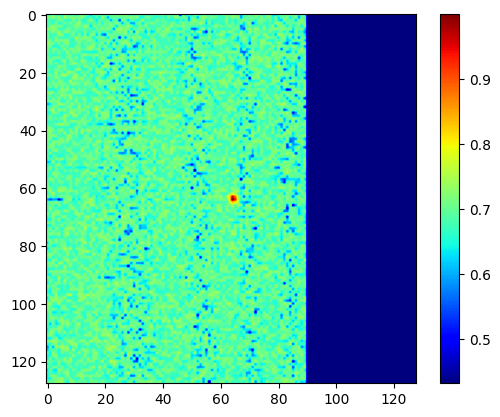

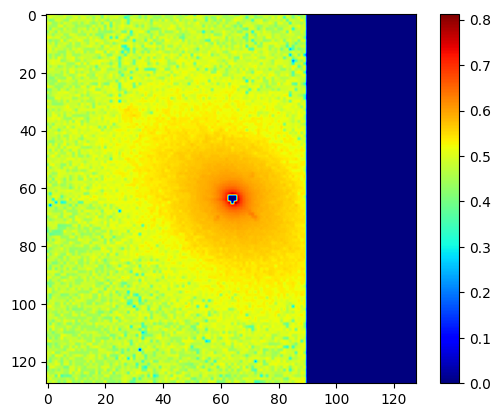

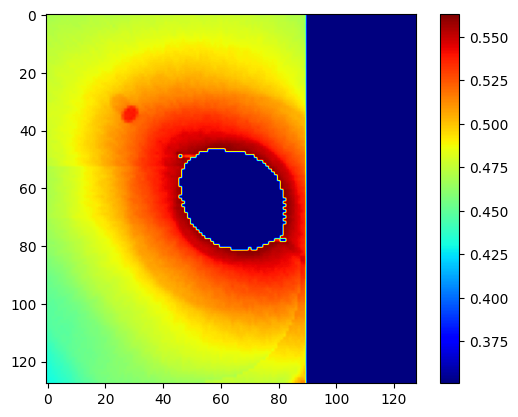

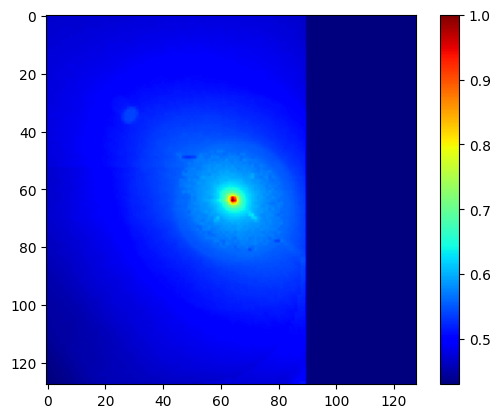

In [9]:
ind = 189 #random.randint(0, len(dataset.map1_list) -1)
print(ind)
map1 = dataset.map1_list[ind]
map2 = dataset.map2_list[ind]
map3 = dataset.map3_list[ind]
combined = dataset.combined_list[ind]
plot_map(map1)
plot_map(map2)
plot_map(map3)
plot_map(combined)

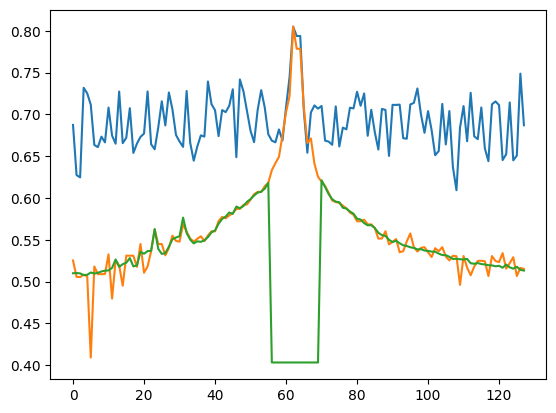

In [10]:
ind = random.randint(0, len(dataset.map1_list)-1)
map1 = dataset.map1_list[ind]
map2 = dataset.map2_list[ind]
map3 = dataset.map3_list[ind]
combined = dataset.combined_list[ind]
azimut = dataset.azimut_list[ind]
plot_radial_profile([map1, map2, map3], azimut)

angle:  115.97440149481892


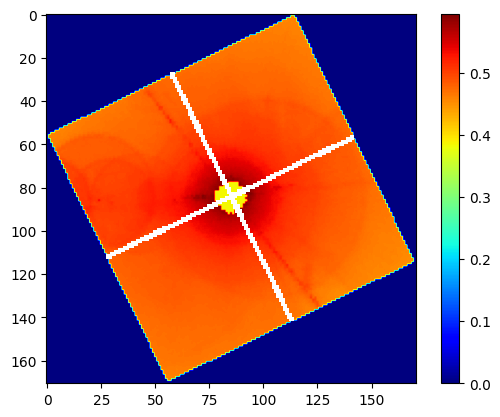

In [11]:
ind = random.randint(0, len(dataset.map1_list)-1)
map = dataset.map3_list[ind]
map[map.shape[0]//2,:] = np.nan
map[:, map.shape[0]//2] = np.nan
angle = dataset.azimut_list[ind] + 90
print('angle: ', angle)
# rotate map while handling nan values
map_rot = rotate(map, angle, reshape=True, order=0)
# replace 0 values with min value of not 0 values
#map_rot[np.isnan(map_rot)] = np.nanmin(map_rot)
plt.imshow(map_rot, cmap='jet')
plt.colorbar()
# draw a horizontal line at the center of the map
#plt.axhline(y=map_rot.shape[0]//2, color='r', linestyle='-')
plt.show()